In [1]:
import matplotlib.pyplot as plt
import ftpretty
import datetime

import bco_dl

%matplotlib inline

In [2]:
#user, passwd = "", ""

In [3]:
c = ftpretty.ftpretty(bco_dl.HOSTNAME, user, passwd)

In [4]:
t_start = datetime.datetime(2018, 12, 29)
t_end = datetime.datetime(2019, 1, 2)
ds_velocity = bco_dl.get_datasets_in_time_range(c, 'vertical_velocity', t_start, t_end)
ds_radar = bco_dl.get_datasets_in_time_range(c, 'radar', t_start, t_end)

In [5]:
ds_velocity, ds_radar = bco_dl.clip_datasets([ds_velocity, ds_radar])

/home/earlcd/anaconda2/envs/bco/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)


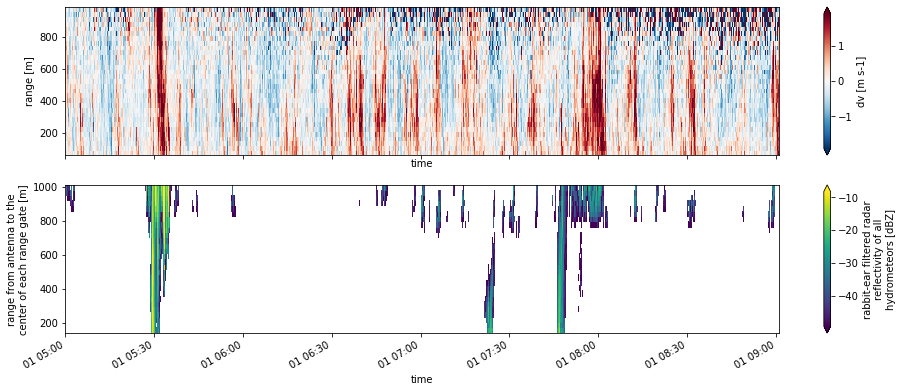

In [6]:
fig, axes = plt.subplots(nrows=2, figsize=(16, 6), sharex=True)
kws = dict(y='range', robust=True)
s = dict(range=slice(50, 1000), time=slice('2019-01-01 05:00', '2019-01-01 09:00'))
ds_velocity.dv.sel(**s).plot(ax=axes[0], **kws)
m_radar = lambda ds_: ds_.where(ds_.Zf > -50)
m_radar(ds_radar).Zf.sel(**s).plot(ax=axes[1], **kws)